In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"
df = pd.read_csv(path)

In [3]:
df.head(6)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
5,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,...,8.5,110.0,5500.0,19,25,15250.0,12.368421,Medium,0,1


# 1. Linear Regression and Multiple Linear Regression

<b>Linear Function</b>
$$
Yhat = a + b  X
$$


<ul>
    <li>a refers to the <b>intercept</b> of the regression line, in other words: the value of Y when X is 0</li>
    <li>b refers to the <b>slope</b> of the regression line, in other words: the value with which Y changes when X increases by 1 unit</li>
</ul>


In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
lm = LinearRegression()
lm

LinearRegression()

## How could "highway-mpg" help us predict car price?

For this example, we want to look at how **highway-mpg** can help us predict **car price**.  
Using **simple linear regression**, we will create a linear function with "highway-mpg" as the predictor variable and "price" as the response variable.


In [9]:
X = df[['highway-mpg']]
Y = df['price']

In [10]:
lm.fit(X,Y)

LinearRegression()

In [11]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [12]:
print("Intercept :", lm.intercept_)


Intercept : 38423.3058581574


In [13]:
print("Coefficient: ", lm.coef_)

Coefficient:  [-821.73337832]


#### Price=38200+(−820)×highway-mpg

## How could "engine-size" help us predict car price?

For this example, we want to look at how **engine-size** can help us predict **car price**.  
Using **simple linear regression**, we will create a linear function with "engine-size" as the predictor variable and "price" as the response variable.


In [16]:
lm1 = LinearRegression()
lm1

LinearRegression()

In [17]:
lm1.fit(df[['engine-size']], df['price'])
lm1

LinearRegression()

In [18]:
# Slope 
lm1.coef_

array([166.86001569])

In [19]:
# Intercept
lm1.intercept_

-7963.338906281046

#### Yhat=-7963.34 + 166.86*X
#### Price=-7963.34 + 166.86*df['engine-size']

## Multiple Linear Regression: Predicting Car Price

In this section, we will use **Multiple Linear Regression** to predict **car price** using several predictor variables:  

- Horsepower  
- Curb-weight  
- Engine-size  
- Highway-mpg  

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$



In [22]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [23]:
lm.fit(Z, df['price'])

LinearRegression()

In [24]:
print("Intercept", lm.intercept_)

Intercept -15806.624626329194


In [25]:
print("Coefiicient", lm.coef_)

Coefiicient [53.49574423  4.70770099 81.53026382 36.05748882]


<b>Price</b> = -15806.624626329194 + 53.49574423 x <b>horsepower</b> +  4.70770099 x <b>curb-weight</b> + 81.53026382 x <b>engine-size</b> + 36.05748882 x <b>highway-mpg</b>


In [27]:
# We are building a multiple linear regression model using **normalized-losses** and **highway-mpg** as
# predictors to estimate **car price**.

lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])


LinearRegression()

In [28]:
lm2.coef_

array([   1.49789586, -820.45434016])

# 2. Model Evaluation Using Visualization

In [30]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

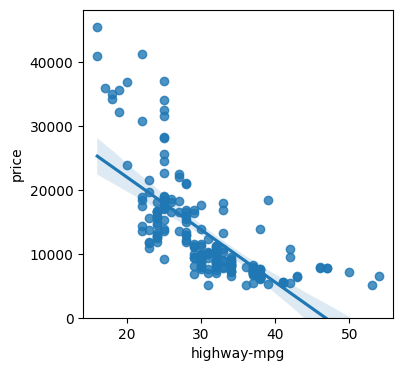

In [31]:
plt.figure(figsize=(4, 4))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,) # y-axis starts from 0
plt.show()

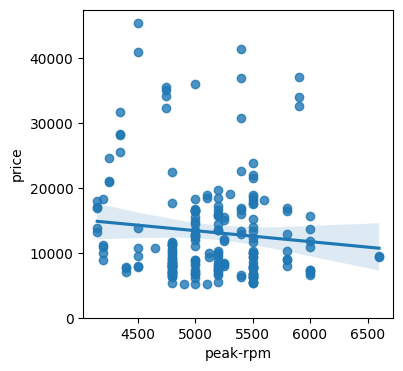

In [32]:
plt.figure(figsize=(4,4))
sns.regplot(x="peak-rpm", y="price", data = df)
plt.ylim(0,) # y-axis starts from 0
plt.show()

In [33]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


<p> So what is a <b>residual plot</b>?</p>

<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>

<p>What do we pay attention to when looking at a residual plot?</p>

<p>We look at the spread of the residuals:</p>

<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data.

Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>


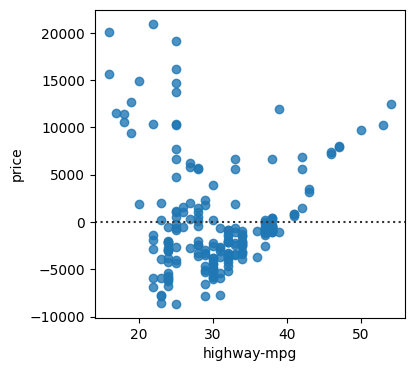

In [35]:
plt.figure(figsize=(4, 4))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

In [36]:
Y_hat = lm.predict(Z)

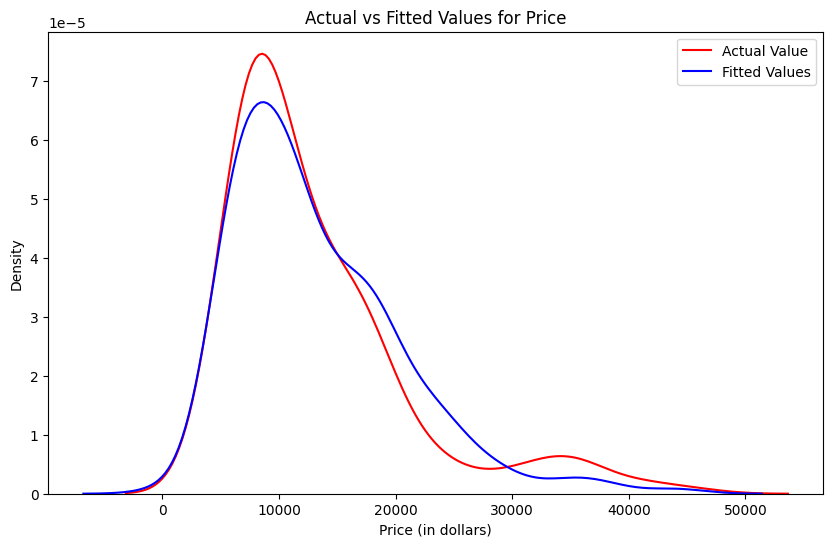

In [37]:
plt.figure(figsize=(10, 6))

# Plot Actual Values
sns.kdeplot(df['price'], color="r", label="Actual Value", fill=False)

# Plot Fitted Values
sns.kdeplot(Y_hat, color="b", label="Fitted Values", fill=False)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Density')
plt.legend()
plt.show()


# 3. Polynomial Regression and Pipelines

Polynomial Regression is a special case of the general linear regression model.  
It models **non-linear relationships** by adding higher-order terms (squared, cubic, etc.) of the predictor variable.  

### Different Orders of Polynomial Regression

**1st Order (Linear Regression):**

$ y = \beta_0 + \beta_1 x + \epsilon $

**2nd Order (Quadratic Regression):**

$ y = \beta_0 + \beta_1 x + \beta_2 x^2 + \epsilon $

**3rd Order (Cubic Regression):**

$ y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \epsilon $


In [40]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [41]:
x = df['highway-mpg']
y = df['price']

In [42]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


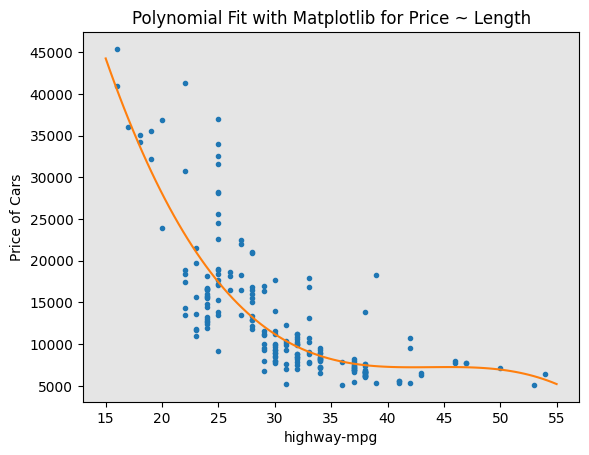

In [43]:
PlotPolly(p, x, y, 'highway-mpg')

In [44]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


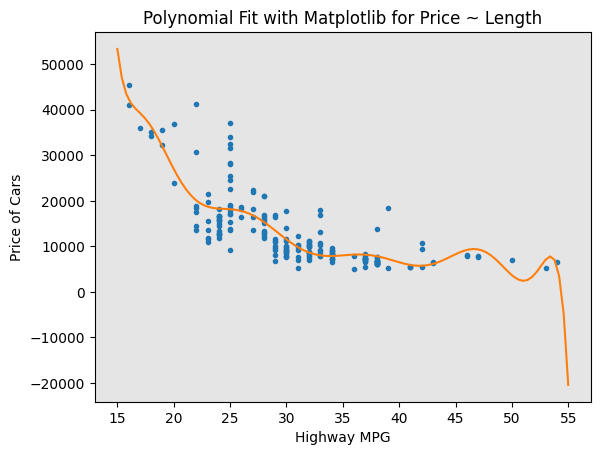

In [45]:
# Here we use a polynomial of the 11rd order (cubic) 
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

### Polynomial features

$$
Yhat = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
$$


In [48]:
from sklearn.preprocessing import PolynomialFeatures

In [49]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [50]:
Z_pr=pr.fit_transform(Z)

In [51]:
Z.shape

(201, 4)

In [52]:
Z_pr.shape

(201, 15)

## Pipeline

<p>Data Pipelines simplify the steps of processing the data. We use the module <b>Pipeline</b> to create a pipeline. We also use <b>StandardScaler</b> as a step in our pipeline.</p>


In [55]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [56]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [57]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [58]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [59]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [60]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]



In [61]:
pipe=Pipeline(Input)

pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [62]:
ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

# 4. Measures for In-Sample Evaluation

### Model 1 Simple Linear fit

In [65]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


In [66]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [67]:
from sklearn.metrics import mean_squared_error

In [68]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


### Model 2 Multiple Linear fit

In [70]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [71]:
Y_predict_multifit = lm.predict(Z)

In [72]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


### Model 3 Polynomial fit

In [74]:
from sklearn.metrics import r2_score

In [75]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


In [76]:
mean_squared_error(df['price'], p(x))

20474146.426361207

# 5. Prediction and Decision Making

In [78]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [79]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [80]:
lm.fit(X, Y)
lm

LinearRegression()

In [81]:
yhat=lm.predict(new_input)
yhat[0:5]

C:\Users\DeLL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

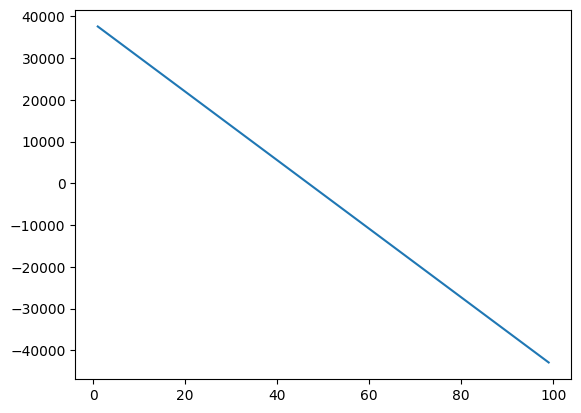

In [82]:
plt.plot(new_input, yhat)
plt.show()

# Decision Making: Determining a Good Model Fit

<p>Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?
<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>


<h4>Let's take a look at the values for the different models.</h4>
<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>
    
<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>
    
<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>


<p>Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and even act as noise. As a result, you should always check the MSE and R^2.</p>

<p>In order to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.
<ul>
    <li><b>MSE</b>: The MSE of SLR is  3.16x10^7  while MLR has an MSE of 1.2 x10^7.  The MSE of MLR is much smaller.</li>
    <li><b>R-squared</b>: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).</li>
</ul>
</p>

This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared to SLR.


## Simple Linear Model (SLR) vs. Polynomial Fit

- **MSE:** The MSE for the **Multiple Linear Regression (MLR)** model is smaller than the MSE for the Polynomial Fit.  
- **R-squared:** The R-squared for the **MLR** is also much larger than for the Polynomial Fit.  

### Conclusion
Comparing these three models, we conclude that the **MLR model** is the best model to predict car price from our dataset.  

This result makes sense since we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price.
